In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('spam.csv',encoding="latin-1")

In [3]:
df.head()

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.isnull().sum()

class            0
message          0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df.columns

Index(['class', 'message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [7]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [8]:
df.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df['class'].value_counts()

ham     4825
spam     747
Name: class, dtype: int64

In [10]:
df[df['message'].str.isspace()]

,class,message


In [11]:
X=df['message']

In [12]:
y=df['class']

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate

In [14]:
from sklearn.metrics import SCORERS

In [15]:
SCORERS

{'explained_variance': make_scorer(explained_variance_score),
 'r2': make_scorer(r2_score),
 'max_error': make_scorer(max_error, greater_is_better=False),
 'neg_median_absolute_error': make_scorer(median_absolute_error, greater_is_better=False),
 'neg_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
 'neg_mean_absolute_percentage_error': make_scorer(mean_absolute_percentage_error, greater_is_better=False),
 'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
 'neg_mean_squared_log_error': make_scorer(mean_squared_log_error, greater_is_better=False),
 'neg_root_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False, squared=False),
 'neg_mean_poisson_deviance': make_scorer(mean_poisson_deviance, greater_is_better=False),
 'neg_mean_gamma_deviance': make_scorer(mean_gamma_deviance, greater_is_better=False),
 'accuracy': make_scorer(accuracy_score),
 'top_k_accuracy': make_scorer(top_k_accuracy_score, ne

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
#len(X_test)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
tfidf=TfidfVectorizer(stop_words='english')

In [20]:
X_train_tfidf=tfidf.fit_transform(X_train)

In [21]:
X_test_tfidf=tfidf.transform(X_test)

In [22]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [23]:
def score(model):
    scores=cross_val_score(model,X_train_tfidf, y_train,scoring='accuracy')

    return scores.mean()

In [24]:
lv=LinearSVC()

In [25]:
score(lv)

0.9751282051282051

In [26]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report, plot_confusion_matrix

In [27]:
def report_score(model):
    pred=model.predict(X_test_tfidf)
    print(classification_report(y_test,pred))
    plot_confusion_matrix(model,X_test_tfidf,y_test)

In [28]:
lv.fit(X_train_tfidf,y_train)

LinearSVC()

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1464
        spam       0.98      0.91      0.95       208

    accuracy                           0.99      1672
   macro avg       0.98      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672



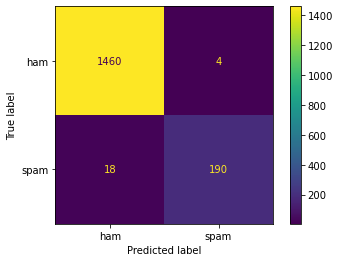

In [29]:
report_score(lv)

In [30]:
knn=KNeighborsClassifier()

In [31]:
knn.fit(X_train_tfidf,y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

         ham       0.91      1.00      0.96      1464
        spam       1.00      0.34      0.51       208

    accuracy                           0.92      1672
   macro avg       0.96      0.67      0.73      1672
weighted avg       0.93      0.92      0.90      1672



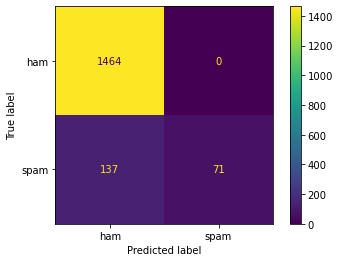

In [32]:
report_score(knn)

In [33]:
rf_model=RandomForestClassifier(random_state=101)

In [34]:
rf_model.fit(X_train_tfidf,y_train)

RandomForestClassifier(random_state=101)

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1464
        spam       0.99      0.82      0.89       208

    accuracy                           0.98      1672
   macro avg       0.98      0.91      0.94      1672
weighted avg       0.98      0.98      0.98      1672



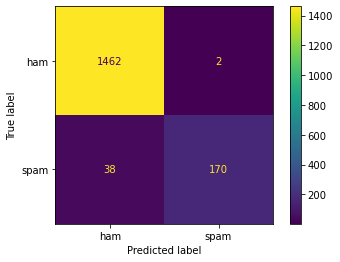

In [35]:
report_score(rf_model)

In [36]:
naive=MultinomialNB()

In [37]:
naive.fit(X_train_tfidf,y_train)

MultinomialNB()

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1464
        spam       1.00      0.79      0.88       208

    accuracy                           0.97      1672
   macro avg       0.99      0.89      0.93      1672
weighted avg       0.97      0.97      0.97      1672



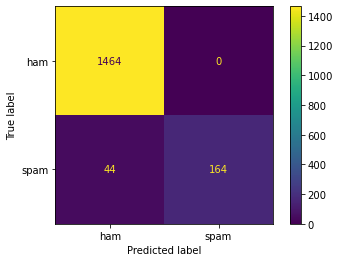

In [38]:
report_score(naive)

In [39]:
from xgboost import XGBClassifier

In [40]:
xgb=XGBClassifier()

In [41]:
xgb.fit(X_train_tfidf,y_train)

[12:35:47] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1464
        spam       0.96      0.80      0.87       208

    accuracy                           0.97      1672
   macro avg       0.97      0.90      0.93      1672
weighted avg       0.97      0.97      0.97      1672



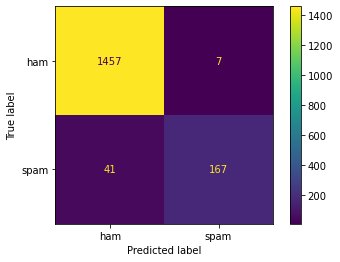

In [42]:
report_score(xgb)

In [43]:
#help(LinearSVC)

In [44]:
lv.predict(X_test_tfidf)

array(['spam', 'ham', 'spam', ..., 'spam', 'ham', 'ham'], dtype=object)

In [45]:
from sklearn.pipeline import Pipeline

In [46]:
pipe=Pipeline([('tfidf',TfidfVectorizer()),('lv',LinearSVC())])

In [47]:
pipe.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('lv', LinearSVC())])

In [49]:
pipe.predict(['you will be killed'])

array(['ham'], dtype=object)

In [56]:
import joblib

In [57]:
joblib.dump(pipe, 'spam.pkl')

['spam.pkl']

In [58]:
loaded_model=joblib.load('spam.pkl')

In [60]:
pipe.predict(['you are good'])

array(['ham'], dtype=object)

In [61]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [63]:
X[2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"